In [293]:
from math import sin, cos, log, ceil
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

In [294]:
# model parameters:
g = 9.8      # gravity in m s^{-2}
v_t = 30.0   # trim velocity in m s^{-1}
C_D = 1/40.0   # drag coefficient --- or D/L if C_L=1
C_L = 1

### set initial conditions ###
v0 = v_t
theta0 = 0.0*(np.pi/180) # initial angle of trajectory
x0 = 0     # arbitrary horizontal position
y0 = 1000  # initial altitude
print(theta0)

0.0


In [295]:
def f(u):
    """Returns the right-hand side of the phugoid system of equations.
    
    Parameters
    ----------
    u : array of float
        array containing the solution at time n.
        
    Returns
    -------
    dudt : array of float
        array containing the RHS given u.
    """
    
    v = u[0]
    theta = u[1]
    x = u[2]
    y = u[3]
    return np.array([-g*sin(theta) - C_D/C_L*g/v_t**2*v**2,
                    -g*cos(theta)/v + g/v_t**2*v,
                    v*cos(theta),
                    v*sin(theta)])

In [296]:
def euler_step(u, f, dt):
    """Returns the solution at the next time-step using Euler's method.
    
    Parameters
    ----------
    u : array of float
        solution at the previous time-step.
    f : function
        function to compute the RHS of the system of equation.
    dt : float
        time-increment.
        
    Returns
    -------
    u_n_plus_1 : array of float
        approximate solution at the next time step.
    """
    
    return u + dt * f(u)

In [297]:
T = 100                       # final time
dt = 0.1                      # time increment
N = int(T/dt) + 1             # number of time-steps
t = np.linspace(0, T, N)      # time discretization

# initialize the array containing the solution for each time-step
u = np.empty((N,4))
u[0] = np.array([v0, theta0, x0, y0])  # fill 1st element with initial values

# time loop - Euler method
for n in range(N-1):
    
    u[n+1] = euler_step(u[n], f, dt)
    if u[n,3]<0:
        print(n, u[n,3])
        break

# Plot the trajectory

In [298]:
# get the glider's position with respect to the time
x = u[:,2]
y = u[:,3]

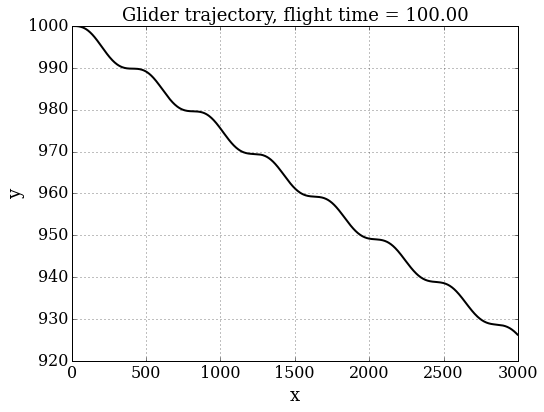

In [299]:
plt.figure(figsize=(8,6))
plt.grid(True)
plt.xlabel(r'x', fontsize=18)
plt.ylabel(r'y', fontsize=18)
plt.title('Glider trajectory, flight time = %.2f' % T, fontsize=18)
plt.plot(x,y, 'k-', lw=2);

# Find best initial angle

In [300]:
d_theta = 0.05
theta_f = 90 * (np.pi/180)
N_theta = int(theta_f/d_theta) + 1
theta_val = np.linspace(0, theta_f, N_theta)
tardis = np.empty_like(theta_val)

for i, theta in enumerate(theta_val):
    theta0 = theta
    N = int(T/dt) + 1             # number of time-steps
    t = np.linspace(0, T, N)      # time discretization
    #print(i)
    #print(u[1,2])

    # initialize the array containing the solution for each time-step
    u = np.empty((N,4))
    u[0] = np.array([v0, theta0, x0, y0])  # fill 1st element with initial values

    # time loop - Euler method
    for n in range(N-1):
    
        u[n+1] = euler_step(u[n], f, dt)
    
    tardis[i] = u[N-1,2]
    #print(u[N-1,2])

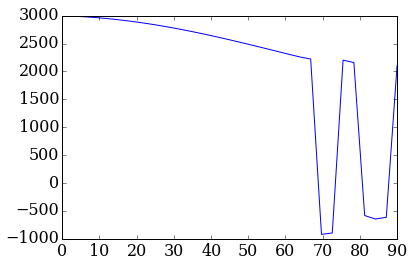

In [301]:
plt.plot(theta_val*(180/np.pi), tardis)

In [302]:
print(np.argmax(tardis))

0


In [303]:
print(tardis[N_theta-1])

2101.70446602


In [304]:
arad = 69.67741935*(np.pi/180)

In [305]:
print(np.where(tardis==arad))

(array([], dtype=int64),)


In [306]:
print(theta_val[24]*(180/np.pi))

69.6774193548


In [307]:
print(tardis[24])

-920.693160678
